# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [78]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [80]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [26]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1          2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2          2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3          1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4          2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
..       ...                  ...                   ...              ...   
95         2  2023-01-01 00:20:38   2023-01-01 00:21:26              1.0   
96         2  2023-01-01 00:09:16   2023-01-01 00:30:17              1.0   
97         2  2023-01-01 00:46:56   2023-01-01 00:59:16              1.0   
98         2  2023-01-01 00:10:50   2023-01-01 00:20:19              1.0   
99         2  2023-01-01 00:27:35   2023-01-01 00:37:49              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.97         1.0                  N           161           141   
1            1.10         1.0                  N            43           237   
2            2.51         1.0                  N            48           238   
3            1.90         1.0                  N           138             7   
4            1.43         1.0                  N           107            79   
..            ...         ...                ...           ...           ...   
95           0.08         1.0                  N            75            75   
96           6.22         1.0                  N           138            95   
97           4.56         1.0                  N           132           218   
98           1.41         1.0                  N           264           186   
99           1.70         1.0                  N           264           114   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              2          9.3   1.00      0.5        0.00           0.0   
1              1          7.9   1.00      0.5        4.00           0.0   
2              1         14.9   1.00      0.5       15.00           0.0   
3              1         12.1   7.25      0.5        0.00           0.0   
4              1         11.4   1.00      0.5        3.28           0.0   
..           ...          ...    ...      ...         ...           ...   
95             2          3.0   1.00      0.5        0.00           0.0   
96             2         31.0   6.00      0.5        0.00           0.0   
97             1         20.5   1.00      0.5        5.75           0.0   
98             1         10.7   1.00      0.5        3.92           0.0   
99             1         11.4   1.00      0.5        2.00           0.0   

    improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                     1.0         14.30                   2.5         0.00  
1                     1.0         16.90                   2.5         0.00  
2                     1.0         34.90                   2.5         0.00  
3                     1.0         20.85                   0.0         1.25  
4                     1.0         19.68                   2.5         0.00  
..                    ...           ...                   ...          ...  
95                    1.0          5.50                   0.0         0.00  
96                    1.0         39.75                   0.0         1.25  
97                    1.0         30.00                   0.0         1.25  
98                    1.0         19.62                   2.5         0.00  
99                    1.0         18.40                   2.5         0.00  

[100 rows x 19 columns]

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [33]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
Sample_data = df['tpep_pickup_datetime'].sample(frac = 0.05, random_state = 42)
Sample_data.head()

323412    2023-01-05 07:50:08
1491266   2023-01-17 07:47:24
2385670   2023-01-25 21:57:59
766545    2023-01-09 19:36:54
980153    2023-01-11 22:19:13
Name: tpep_pickup_datetime, dtype: datetime64[us]

In [35]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:\\Users\\srivi\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
final_df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        df['hour'] = df['tpep_pickup_datetime'].dt.hour
        df['date'] = df['tpep_pickup_datetime'].dt.date
            # Iterate through each hour of the selected date
        for date in df['date'].unique():
            for hour in range(24):
                hour_data = df[(df['date'] == date) & (df['hour'] == hour)]
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        final_df = pd.concat([final_df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file sampled_data.csv: Could not open Parquet input source '<Buffer>': Parquet file size is 2 bytes, smaller than the minimum file footer (8 bytes)


In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2705104
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [51]:
# Store the df in csv/parquet
# df.to_parquet('')
df = final_df.sample(n=300000, random_state=42)
df.to_csv(r'C:\\Users\\srivi\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 950221 to 1684749
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289777 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289777 non-null  float64       
 6   store_and_fwd_flag     289777 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  flo

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [84]:
# Load the new data file
df=pd.read_csv('C:\\Users\\srivi\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records.csv')

In [85]:
# df.head()
df.head(20)

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       950221         2  2023-06-09 14:32:05   2023-06-09 14:42:33   
1      2624664         2  2023-07-29 18:40:35   2023-07-29 18:42:13   
2      3263694         2  2023-05-30 17:11:50   2023-05-30 17:19:50   
3      1626337         2  2023-05-15 14:55:35   2023-05-15 15:09:40   
4      1621670         2  2023-03-16 00:18:39   2023-03-16 00:28:07   
5      3048956         1  2023-05-27 23:56:38   2023-05-27 23:58:38   
6      1038493         2  2023-08-12 11:14:11   2023-08-12 11:45:17   
7      1007796         2  2023-09-11 11:36:13   2023-09-11 11:38:31   
8      1239471         2  2023-08-14 18:34:19   2023-08-14 19:19:27   
9      1808190         1  2023-03-17 17:25:41   2023-03-17 17:37:48   
10     1554141         2  2023-07-18 21:17:20   2023-07-18 21:59:14   
11     3397962         2  2023-05-31 21:32:01   2023-05-31 21:45:53   
12     2020444         2  2023-07-23 15:30:21   2023-07-23 15:43:18   
13     2701550         2  2023-12-25 12:07:38   2023-12-25 12:35:17   
14     1693206         1  2023-05-16 05:45:18   2023-05-16 06:05:24   
15     1548200         2  2023-08-18 01:34:06   2023-08-18 02:04:23   
16     2006863         2  2023-05-18 16:52:40   2023-05-18 17:05:16   
17     3126731         2  2023-06-30 07:40:26   2023-06-30 07:45:38   
18      936314         2  2023-02-10 10:45:56   2023-02-10 11:11:55   
19     1009689         1  2023-05-10 09:37:26   2023-05-10 09:52:07   

    passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0               3.0           0.85         1.0                  N   
1               1.0           0.42         1.0                  N   
2               1.0           1.03         1.0                  N   
3               1.0           2.09         1.0                  N   
4               1.0           3.31         1.0                  N   
5               1.0           0.50         1.0                  N   
6               4.0           7.90         1.0                  N   
7               1.0           0.34         1.0                  N   
8               1.0          23.90         1.0                  N   
9               2.0           2.30         1.0                  N   
10              3.0          20.98         2.0                  N   
11              1.0           6.17         1.0                  N   
12              1.0           2.21         1.0                  N   
13              2.0          11.15         1.0                  N   
14              1.0          17.00         1.0                  N   
15              1.0          19.79         2.0                  N   
16              1.0           1.24         1.0                  N   
17              1.0           0.98         1.0                  N   
18              1.0           3.03         1.0                  N   
19              1.0           1.30         1.0                  N   

    PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0            236           237  ...      0.5        0.00          0.00   
1            263           236  ...      0.5        0.00          0.00   
2            140           262  ...      0.5        3.16          0.00   
3            158           161  ...      0.5        3.78          0.00   
4            107           140  ...      0.5        4.97          0.00   
5            179             7  ...      0.5        0.00          0.00   
6            143            45  ...      0.5        8.54          0.00   
7            170           164  ...      0.5        1.68          0.00   
8            132           228  ...      0.5       19.18          0.00   
9             68           233  ...      0.5        0.00          0.00   
10           132           239  ...      0.5       10.00          6.55   
11           246           152  ...      0.5        7.00          0.00   
12           113           107  ...      0.5        3.64          0.00   
13           163          

In [86]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             300000 non-null  int64  
 1   VendorID               300000 non-null  int64  
 2   tpep_pickup_datetime   300000 non-null  object 
 3   tpep_dropoff_datetime  300000 non-null  object 
 4   passenger_count        289777 non-null  float64
 5   trip_distance          300000 non-null  float64
 6   RatecodeID             289777 non-null  float64
 7   store_and_fwd_flag     289777 non-null  object 
 8   PULocationID           300000 non-null  int64  
 9   DOLocationID           300000 non-null  int64  
 10  payment_type           300000 non-null  int64  
 11  fare_amount            300000 non-null  float64
 12  extra                  300000 non-null  float64
 13  mta_tax                300000 non-null  float64
 14  tip_amount             300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [92]:
# Fix the index and drop any columns that are not needed
df=df.drop(columns=['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             300000 non-null  int64  
 1   VendorID               300000 non-null  int64  
 2   tpep_pickup_datetime   300000 non-null  object 
 3   tpep_dropoff_datetime  300000 non-null  object 
 4   passenger_count        289777 non-null  float64
 5   trip_distance          300000 non-null  float64
 6   RatecodeID             289777 non-null  float64
 7   store_and_fwd_flag     289777 non-null  object 
 8   PULocationID           300000 non-null  int64  
 9   DOLocationID           300000 non-null  int64  
 10  payment_type           300000 non-null  int64  
 11  fare_amount            300000 non-null  float64
 12  extra                  300000 non-null  float64
 13  mta_tax                300000 non-null  float64
 14  tip_amount             300000 non-nu

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [96]:
# Combine the two airport fee columns
df['combined_airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)
df=df.drop(columns=['airport_fee','Airport_fee'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             300000 non-null  int64  
 1   VendorID               300000 non-null  int64  
 2   tpep_pickup_datetime   300000 non-null  object 
 3   tpep_dropoff_datetime  300000 non-null  object 
 4   passenger_count        289777 non-null  float64
 5   trip_distance          300000 non-null  float64
 6   RatecodeID             289777 non-null  float64
 7   store_and_fwd_flag     289777 non-null  object 
 8   PULocationID           300000 non-null  int64  
 9   DOLocationID           300000 non-null  int64  
 10  payment_type           300000 non-null  int64  
 11  fare_amount            300000 non-null  float64
 12  extra                  300000 non-null  float64
 13  mta_tax                300000 non-null  float64
 14  tip_amount             300000 non-nu

In [98]:
df.head(20)

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       950221         2  2023-06-09 14:32:05   2023-06-09 14:42:33   
1      2624664         2  2023-07-29 18:40:35   2023-07-29 18:42:13   
2      3263694         2  2023-05-30 17:11:50   2023-05-30 17:19:50   
3      1626337         2  2023-05-15 14:55:35   2023-05-15 15:09:40   
4      1621670         2  2023-03-16 00:18:39   2023-03-16 00:28:07   
5      3048956         1  2023-05-27 23:56:38   2023-05-27 23:58:38   
6      1038493         2  2023-08-12 11:14:11   2023-08-12 11:45:17   
7      1007796         2  2023-09-11 11:36:13   2023-09-11 11:38:31   
8      1239471         2  2023-08-14 18:34:19   2023-08-14 19:19:27   
9      1808190         1  2023-03-17 17:25:41   2023-03-17 17:37:48   
10     1554141         2  2023-07-18 21:17:20   2023-07-18 21:59:14   
11     3397962         2  2023-05-31 21:32:01   2023-05-31 21:45:53   
12     2020444         2  2023-07-23 15:30:21   2023-07-23 15:43:18   
13     2701550         2  2023-12-25 12:07:38   2023-12-25 12:35:17   
14     1693206         1  2023-05-16 05:45:18   2023-05-16 06:05:24   
15     1548200         2  2023-08-18 01:34:06   2023-08-18 02:04:23   
16     2006863         2  2023-05-18 16:52:40   2023-05-18 17:05:16   
17     3126731         2  2023-06-30 07:40:26   2023-06-30 07:45:38   
18      936314         2  2023-02-10 10:45:56   2023-02-10 11:11:55   
19     1009689         1  2023-05-10 09:37:26   2023-05-10 09:52:07   

    passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0               3.0           0.85         1.0                  N   
1               1.0           0.42         1.0                  N   
2               1.0           1.03         1.0                  N   
3               1.0           2.09         1.0                  N   
4               1.0           3.31         1.0                  N   
5               1.0           0.50         1.0                  N   
6               4.0           7.90         1.0                  N   
7               1.0           0.34         1.0                  N   
8               1.0          23.90         1.0                  N   
9               2.0           2.30         1.0                  N   
10              3.0          20.98         2.0                  N   
11              1.0           6.17         1.0                  N   
12              1.0           2.21         1.0                  N   
13              2.0          11.15         1.0                  N   
14              1.0          17.00         1.0                  N   
15              1.0          19.79         2.0                  N   
16              1.0           1.24         1.0                  N   
17              1.0           0.98         1.0                  N   
18              1.0           3.03         1.0                  N   
19              1.0           1.30         1.0                  N   

    PULocationID  DOLocationID  ...  fare_amount  extra  mta_tax  tip_amount  \
0            236           237  ...         10.7    0.0      0.5        0.00   
1            263           236  ...          4.4    0.0      0.5        0.00   
2            140           262  ...          9.3    2.5      0.5        3.16   
3            158           161  ...         14.9    0.0      0.5        3.78   
4            107           140  ...         14.9    1.0      0.5        4.97   
5            179             7  ...          4.4    1.0      0.5        0.00   
6            143            45  ...         38.7    0.0      0.5        8.54   
7            170           164  ...          4.4    0.0      0.5        1.68   
8            132           228  ...         91.9    2.5      0.5       19.18   
9             68           233  ...         12.8    5.0      0.5        0.00   
10           132           239  ...         70.0    0.0      0.5       10.00   
11           246           152  ...         26.1    1.0      0.5        7.00   
12           113      

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [101]:
# check where values of fare amount are negative
negative_amount=df[df.fare_amount<0]
negative_amount.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             0 non-null      int64  
 1   VendorID               0 non-null      int64  
 2   tpep_pickup_datetime   0 non-null      object 
 3   tpep_dropoff_datetime  0 non-null      object 
 4   passenger_count        0 non-null      float64
 5   trip_distance          0 non-null      float64
 6   RatecodeID             0 non-null      float64
 7   store_and_fwd_flag     0 non-null      object 
 8   PULocationID           0 non-null      int64  
 9   DOLocationID           0 non-null      int64  
 10  payment_type           0 non-null      int64  
 11  fare_amount            0 non-null      float64
 12  extra                  0 non-null      float64
 13  mta_tax                0 non-null      float64
 14  tip_amount             0 non-null      float64
 15  tolls_amount           

Did you notice something different in the `RatecodeID` column for above records?

In [104]:
# Analyse RatecodeID for the negative fare amounts
negative_amount['RatecodeID']


Series([], Name: RatecodeID, dtype: float64)

In [106]:
# Find which columns have negative values
negative_value=[]
for column in df.columns:
    if(df[column].dtypes)!="object":
        if(df[column]<0).any():
            negative_value.append(column)
negative_value

['mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'combined_airport_fee']

In [108]:
# fix these negative values
drop_row = df[df[negative_value].lt(0).any(axis=1)].index
df = df.drop(index=drop_row).reset_index(drop=True)
df

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           950221         2  2023-06-09 14:32:05   2023-06-09 14:42:33   
1          2624664         2  2023-07-29 18:40:35   2023-07-29 18:42:13   
2          3263694         2  2023-05-30 17:11:50   2023-05-30 17:19:50   
3          1626337         2  2023-05-15 14:55:35   2023-05-15 15:09:40   
4          1621670         2  2023-03-16 00:18:39   2023-03-16 00:28:07   
...            ...       ...                  ...                   ...   
299979     2041602         2  2023-02-21 10:18:33   2023-02-21 10:24:08   
299980     2411945         2  2023-01-26 08:04:03   2023-01-26 08:13:55   
299981     3042855         1  2023-04-29 13:57:27   2023-04-29 14:01:12   
299982      788141         1  2023-04-08 16:05:48   2023-04-08 16:29:41   
299983     1684749         1  2023-01-18 23:21:12   2023-01-18 23:23:05   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   3.0           0.85         1.0                  N   
1                   1.0           0.42         1.0                  N   
2                   1.0           1.03         1.0                  N   
3                   1.0           2.09         1.0                  N   
4                   1.0           3.31         1.0                  N   
...                 ...            ...         ...                ...   
299979              1.0           0.65         1.0                  N   
299980              2.0           1.54         1.0                  N   
299981              1.0           0.70         1.0                  N   
299982              1.0           3.10        99.0                  N   
299983              2.0           0.70         1.0                  N   

        PULocationID  DOLocationID  ...  fare_amount  extra  mta_tax  \
0                236           237  ...         10.7    0.0      0.5   
1                263           236  ...          4.4    0.0      0.5   
2                140           262  ...          9.3    2.5      0.5   
3                158           161  ...         14.9    0.0      0.5   
4                107           140  ...         14.9    1.0      0.5   
...              ...           ...  ...          ...    ...      ...   
299979           137           170  ...          7.2    0.0      0.5   
299980           141           161  ...         10.7    0.0      0.5   
299981           236           236  ...          5.8    2.5      0.5   
299982            25           225  ...         18.2    0.0      0.5   
299983           233           137  ...          5.1    3.5      0.5   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0             0.00           0.0                    1.0         14.70   
1             0.00           0.0                    1.0          8.40   
2             3.16           0.0                    1.0         18.96   
3             3.78           0.0                    1.0         22.68   
4             4.97           0.0                    1.0         24.87   
...            ...           ...                    ...           ...   
299979        2.00           0.0                    1.0         13.20   
299980        2.94           0.0                    1.0         17.64   
299981        0.00           0.0                    1.0          9.80   
299982        0.00           0.0                    1.0         19.70   
299983        2.00           0.0                    1.0         12.10   

        congestion_surcharge  hour  combined_airport_fee  
0                        2.5    14                   0.0  
1                        2.5    18                   0.0  
2                        2.5    17                   0.0  
3                        2.5    14                   0.0  
4                        2.5     0                   0.0  
...                      ...   ...                   ...  
299979                   2.5    10                   0.0  
299980          

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [112]:
# Find the proportion of missing values in each column
df.isna().mean()

Unnamed: 0               0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034078
trip_distance            0.000000
RatecodeID               0.034078
store_and_fwd_flag       0.034078
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034078
hour                     0.000000
combined_airport_fee     0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [115]:
# Display the rows with null values
df.isna().sum()
# Impute NaN values in 'passenger_count'
print(df['passenger_count'].describe())
df['passenger_count'] = df['passenger_count'].fillna(1)

count    289761.000000
mean          1.370309
std           0.893475
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: passenger_count, dtype: float64


Did you find zeroes in passenger_count? Handle these.

In [118]:
df.passenger_count.isna().sum()

0

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [121]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].apply(lambda x: x if x in [1,2,3,4,5,6]else 1)
df['RatecodeID'].value_counts()


RatecodeID
1.0    285412
2.0     11350
5.0      1609
3.0       982
4.0       630
6.0         1
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [124]:
# handle null values in congestion_surcharge
surcharge_price = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge']= df['congestion_surcharge'].fillna(surcharge_price)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [127]:
# Handle any remaining missing values
df['store_and_fwd_flag']=df['store_and_fwd_flag'].fillna('N')
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
hour                     0
combined_airport_fee     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [131]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

Unnamed: 0       VendorID  passenger_count  trip_distance  \
count  2.999840e+05  299984.000000    299984.000000  299984.000000   
mean   1.606239e+06       1.733942         1.357689       3.727252   
std    9.390105e+05       0.447219         0.880685      69.117655   
min    1.400000e+01       1.000000         0.000000       0.000000   
25%    7.971998e+05       1.000000         1.000000       1.040000   
50%    1.596345e+06       2.000000         1.000000       1.790000   
75%    2.394250e+06       2.000000         1.000000       3.400000   
max    3.522061e+06       6.000000         8.000000   22910.920000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  299984.000000  299984.000000  299984.000000  299984.000000   
mean        1.072154     165.224352     164.123703       1.164319   
std         0.387977      64.135894      69.813690       0.507187   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000     132.000000     114.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max         6.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  299984.000000  299984.000000  299984.000000  299984.000000   
mean       19.826460       1.584720       0.495266       3.548264   
std        18.360941       1.828818       0.048538       4.119575   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.840000   
75%        21.900000       2.500000       0.500000       4.420000   
max       999.000000      20.800000       0.800000     200.000000   

        tolls_amount  improvement_surcharge   total_amount  \
count  299984.000000          299984.000000  299984.000000   
mean        0.590956               0.998974      28.882358   
std         2.174320               0.029465      22.908830   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.842500   
max        87.500000               1.000000    1000.000000   

       congestion_surcharge           hour  combined_airport_fee  
count         299984.000000  299984.000000         299984.000000  
mean               2.313640      14.256944              0.138015  
std                0.656636       5.816534              0.457619  
min                0.000000       0.000000              0.000000  
25%                2.500000      11.000000              0.000000  
50%                2.500000      15.000000              0.000000  
75%                2.500000      19.000000              0.000000  
max                2.500000      23.000000              1.750000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [136]:
# remove passenger_count > 6
passenger_count_limit = df[df['passenger_count']>6].index
df = df.drop(index=passenger_count_limit).reset_index(drop=True)

In [138]:
# Continue with outlier handling

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299983 entries, 0 to 299982
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             299983 non-null  int64  
 1   VendorID               299983 non-null  int64  
 2   tpep_pickup_datetime   299983 non-null  object 
 3   tpep_dropoff_datetime  299983 non-null  object 
 4   passenger_count        299983 non-null  float64
 5   trip_distance          299983 non-null  float64
 6   RatecodeID             299983 non-null  float64
 7   store_and_fwd_flag     299983 non-null  object 
 8   PULocationID           299983 non-null  int64  
 9   DOLocationID           299983 non-null  int64  
 10  payment_type           299983 non-null  int64  
 11  fare_amount            299983 non-null  float64
 12  extra                  299983 non-null  float64
 13  mta_tax                299983 non-null  float64
 14  tip_amount             299983 non-nu

In [140]:
# Do any columns need standardising?

df.describe()

Unnamed: 0       VendorID  passenger_count  trip_distance  \
count  2.999830e+05  299983.000000    299983.000000  299983.000000   
mean   1.606240e+06       1.733942         1.357667       3.727201   
std    9.390120e+05       0.447220         0.880603      69.117765   
min    1.400000e+01       1.000000         0.000000       0.000000   
25%    7.971985e+05       1.000000         1.000000       1.040000   
50%    1.596349e+06       2.000000         1.000000       1.790000   
75%    2.394250e+06       2.000000         1.000000       3.400000   
max    3.522061e+06       6.000000         6.000000   22910.920000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  299983.000000  299983.000000  299983.000000  299983.000000   
mean        1.072141     165.224463     164.124000       1.164319   
std         0.387911      64.135972      69.813617       0.507188   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000     132.000000     114.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max         6.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  299983.000000  299983.000000  299983.000000  299983.000000   
mean       19.826253       1.584725       0.495266       3.548226   
std        18.360621       1.828819       0.048538       4.119528   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.840000   
75%        21.900000       2.500000       0.500000       4.420000   
max       999.000000      20.800000       0.800000     200.000000   

        tolls_amount  improvement_surcharge   total_amount  \
count  299983.000000          299983.000000  299983.000000   
mean        0.590934               0.998974      28.882103   
std         2.174292               0.029465      22.908442   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.840000   
max        87.500000               1.000000    1000.000000   

       congestion_surcharge           hour  combined_airport_fee  
count         299983.000000  299983.000000         299983.000000  
mean               2.313648      14.256971              0.138015  
std                0.656624       5.816524              0.457620  
min                0.000000       0.000000              0.000000  
25%                2.500000      11.000000              0.000000  
50%                2.500000      15.000000              0.000000  
75%                2.500000      19.000000              0.000000  
max                2.500000      23.000000              1.750000

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [143]:
df.columns.tolist()

['Unnamed: 0',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'hour',
 'combined_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

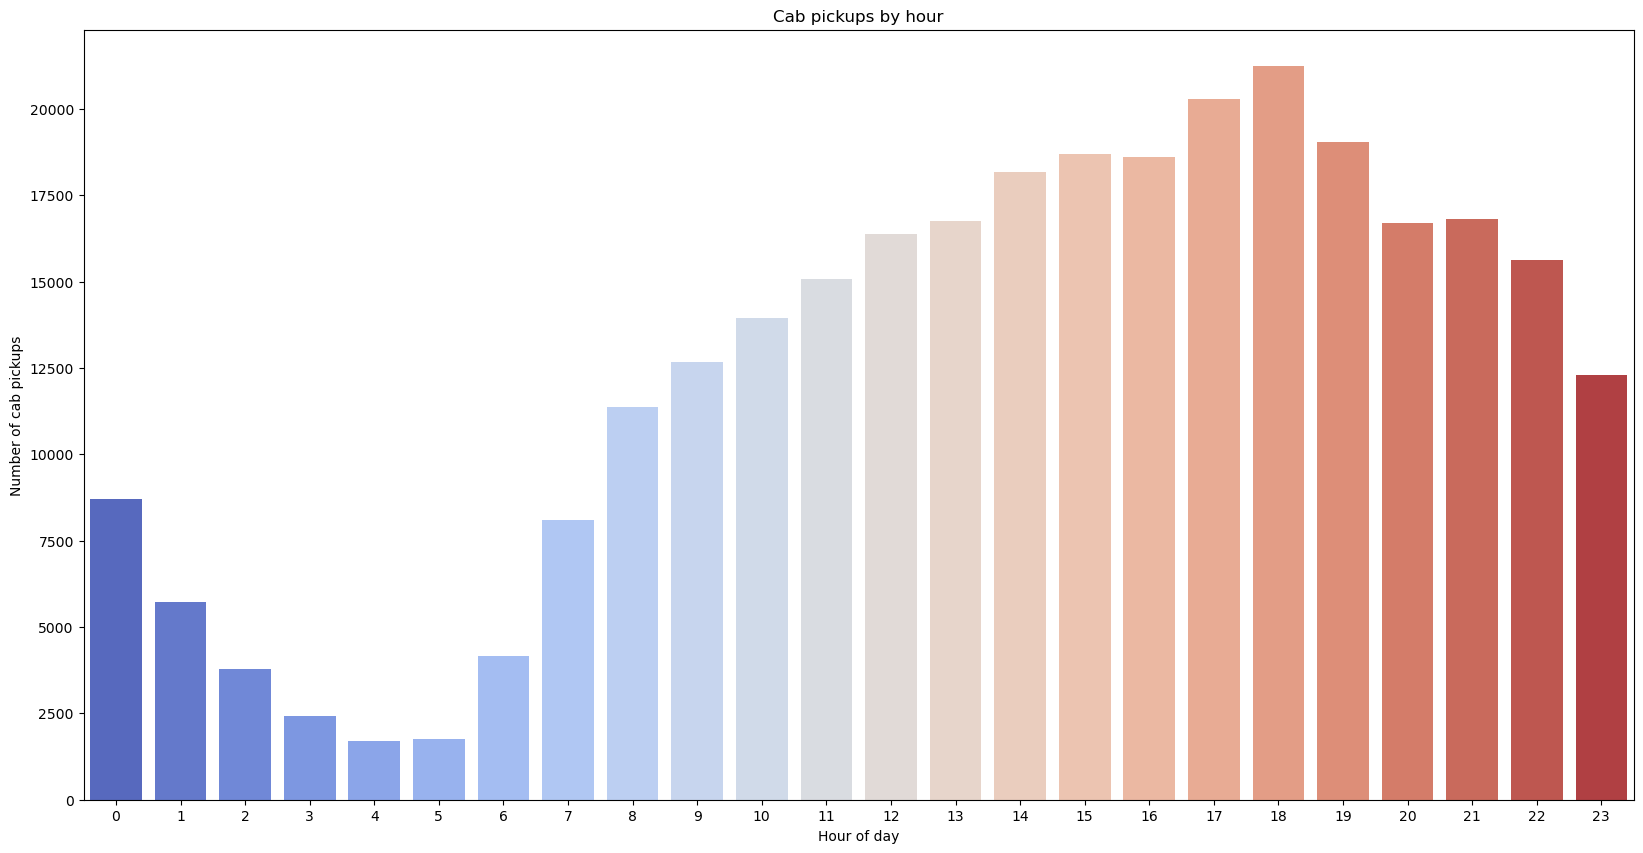

In [149]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(20,10))
sns.countplot(x=df['hour'],palette="coolwarm")
plt.xlabel("Hour of day")
plt.ylabel("Number of cab pickups")
plt.title("Cab pickups by hour")
plt.show()

In [150]:
# Find and show the daily trends in taxi pickups (days of the week)
df['day_of_pick']=pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek
df['day_of_pick']

0         4
1         5
2         1
3         0
4         3
         ..
299978    1
299979    3
299980    5
299981    5
299982    2
Name: day_of_pick, Length: 299983, dtype: int32

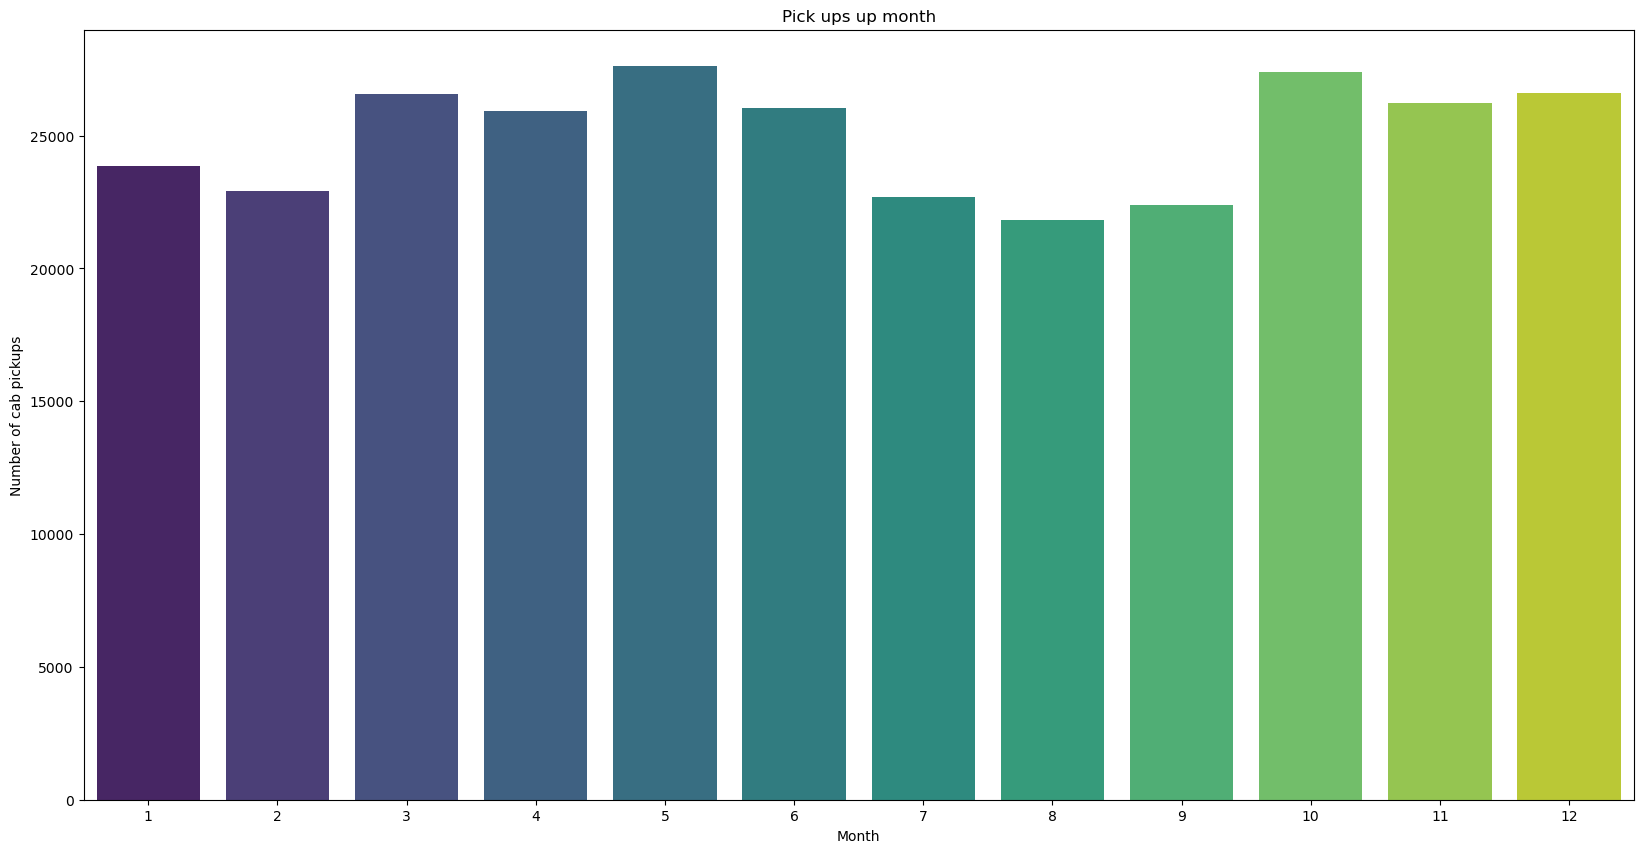

In [151]:
# Show the monthly trends in pickups
df['pickupmonth']=pd.to_datetime(df['tpep_dropoff_datetime']).dt.month
plt.figure(figsize=(20,10))
sns.countplot(x=df['pickupmonth'],palette='viridis')
plt.xlabel("Month")
plt.ylabel("Number of cab pickups")
plt.title("Pick ups up month")
plt.xticks(ticks=range(0,12))
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [156]:
# Analyse the above parameters
print('fare_amount:', (df['fare_amount']<=0).sum())
print('total_amount:', (df['total_amount']<=0).sum())
print('trip_distance:', (df['trip_distance']<=0).sum())
print('tip_amount:', (df['tip_amount']<=0).sum())

fare_amount: 92
total_amount: 52
trip_distance: 5857
tip_amount: 69171


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?
Based of the data that is there i would say tip amount should not be removed as that can show insights as what would encourage a tip rather than no tip.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [161]:
# Create a df with non zero entries for the selected parameters.
df=df[(df['fare_amount'] > 0) & (df['tip_amount'] > 0)&(df['total_amount']>0) &(df['trip_distance'] > 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229405 entries, 2 to 299982
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             229405 non-null  int64  
 1   VendorID               229405 non-null  int64  
 2   tpep_pickup_datetime   229405 non-null  object 
 3   tpep_dropoff_datetime  229405 non-null  object 
 4   passenger_count        229405 non-null  float64
 5   trip_distance          229405 non-null  float64
 6   RatecodeID             229405 non-null  float64
 7   store_and_fwd_flag     229405 non-null  object 
 8   PULocationID           229405 non-null  int64  
 9   DOLocationID           229405 non-null  int64  
 10  payment_type           229405 non-null  int64  
 11  fare_amount            229405 non-null  float64
 12  extra                  229405 non-null  float64
 13  mta_tax                229405 non-null  float64
 14  tip_amount             229405 non-null  f

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [164]:
# Group data by month and analyse monthly revenue
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['month'] = df['tpep_dropoff_datetime'].dt.month
revenue_by_month = df.groupby('month')['total_amount'].sum()
print(revenue_by_month)


month
1     515724.74
2     499823.03
3     598001.57
4     581895.40
5     640986.99
6     598342.27
7     510847.49
8     485999.35
9     520539.94
10    644367.81
11    608471.45
12    592127.36
Name: total_amount, dtype: float64


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [167]:
# Calculate proportion of each quarter
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['quarter'] = df['tpep_dropoff_datetime'].dt.quarter
revenue_per_quarter = df.groupby('quarter')['total_amount'].sum()
print(revenue_per_quarter)



quarter
1    1613549.34
2    1821224.66
3    1517386.78
4    1844966.62
Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

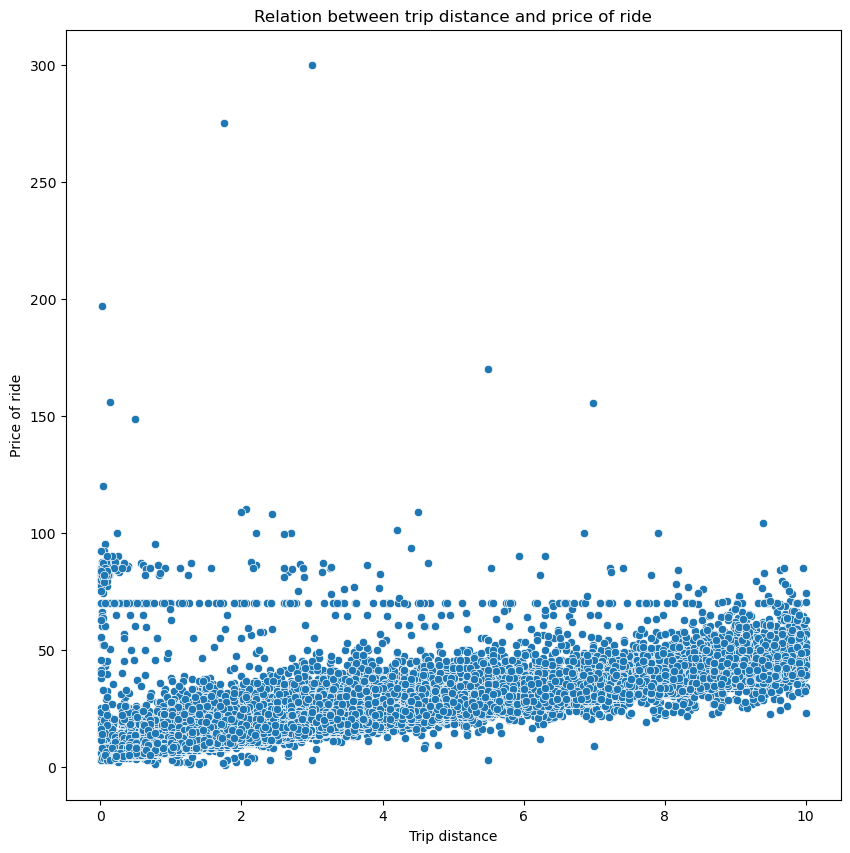

In [170]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10,10))
newdf = df[(df['trip_distance'] >= 0) & (df['trip_distance'] <= 10)]
sns.scatterplot(data=newdf,x='trip_distance',y='fare_amount')
plt.xlabel("Trip distance")
plt.ylabel('Price of ride')
plt.title('Relation between trip distance and price of ride')
plt.show()
                


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

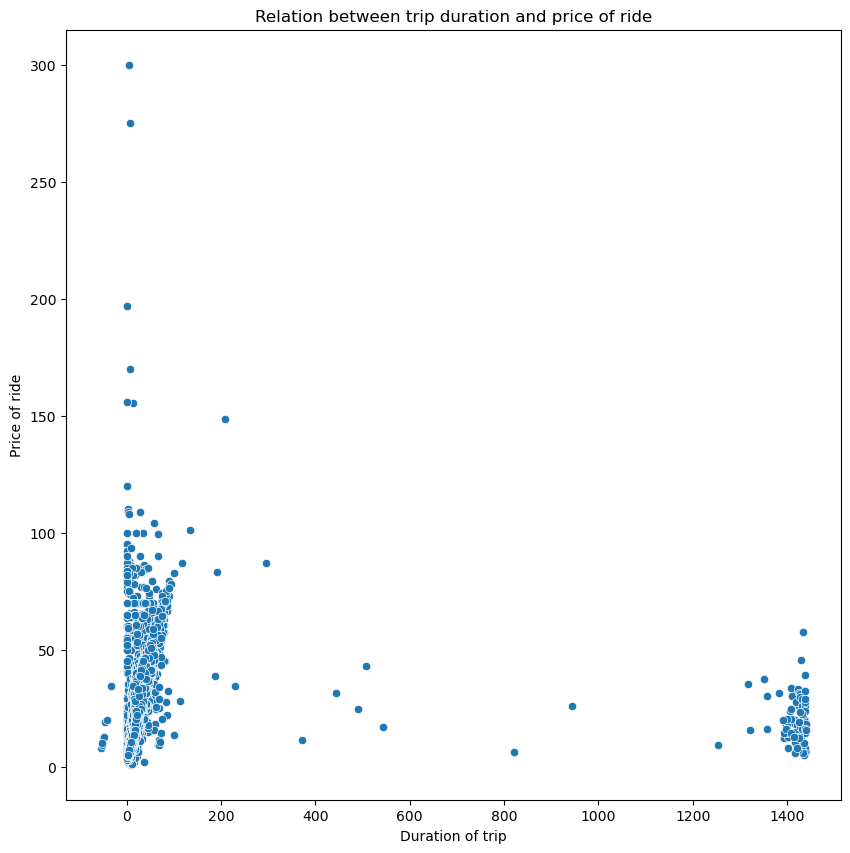

In [173]:
# Show relationship between fare and trip duration
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
newdf = df[(df['trip_duration'] > 0) & (df['trip_duration'] <= 120) & (df['fare_amount'] > 0)]
plt.figure(figsize=(10,10))
newdf = df[(df['trip_distance'] >= 0) & (df['trip_distance'] <= 10)]
sns.scatterplot(data=newdf,x='trip_duration',y='fare_amount')
plt.xlabel("Duration of trip")
plt.ylabel('Price of ride')
plt.title('Relation between trip duration and price of ride')
plt.show()

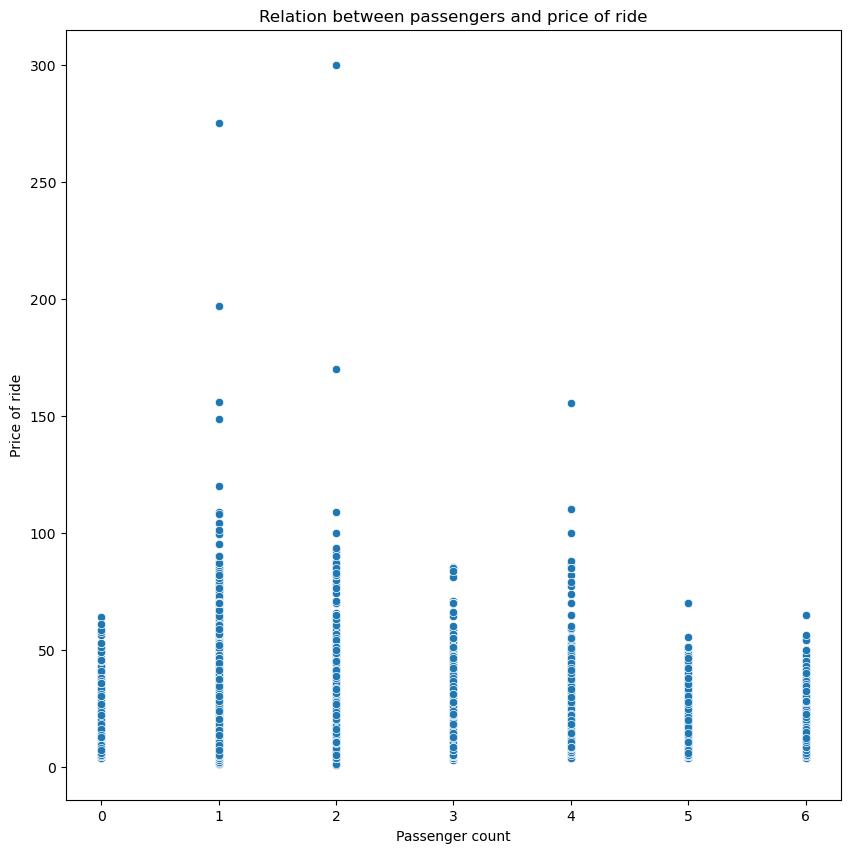

In [174]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10,10))
sns.scatterplot(data=newdf,x='passenger_count',y='fare_amount')
plt.xlabel("Passenger count")
plt.ylabel('Price of ride')
plt.title('Relation between passengers and price of ride')
plt.show()

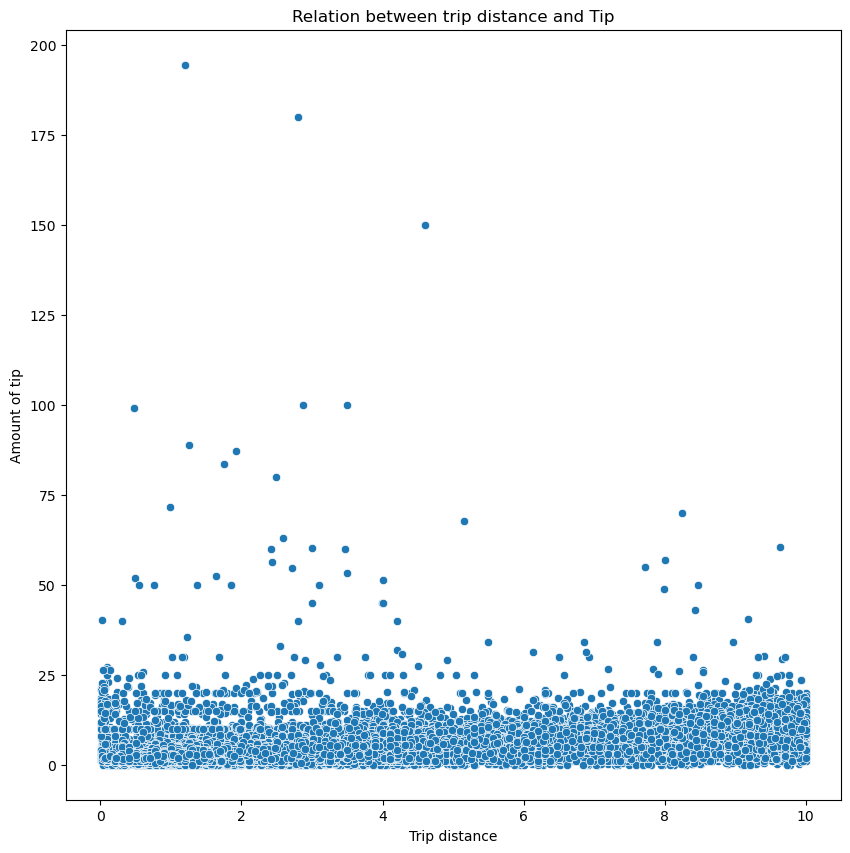

In [175]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10,10))
newdf = df[(df['trip_distance'] >= 0) & (df['trip_distance'] <= 10)]
sns.scatterplot(data=newdf,x='trip_distance',y='tip_amount')
plt.xlabel("Trip distance")
plt.ylabel('Amount of tip')
plt.title('Relation between trip distance and Tip')
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

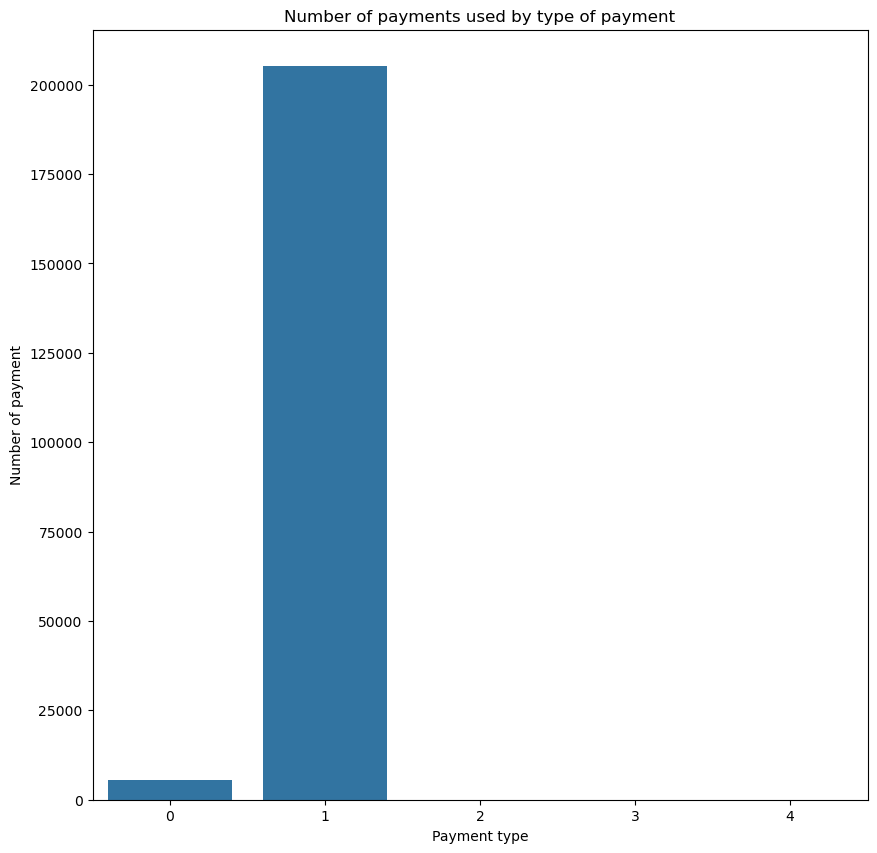

array([1, 0, 2, 3, 4], dtype=int64)

In [178]:
# Analyse the distribution of different payment types (payment_type).
type_of_payment=newdf["payment_type"].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=type_of_payment.index,y=type_of_payment.values)
plt.xlabel("Payment type")
plt.ylabel("Number of payment")
plt.title("Number of payments used by type of payment")
plt.show()
df['payment_type'].unique()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [186]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [188]:
# import geopandas as gpd
import geopandas as gpd
import os
shapefile_name = "C:\\Users\\srivi\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\taxi_zones\\taxi_zones.shp"
map_file_path = os.path.join(os.getcwd(),shapefile_name)
# Read the shapefile using geopandas
zones = gpd.read_file(map_file_path)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

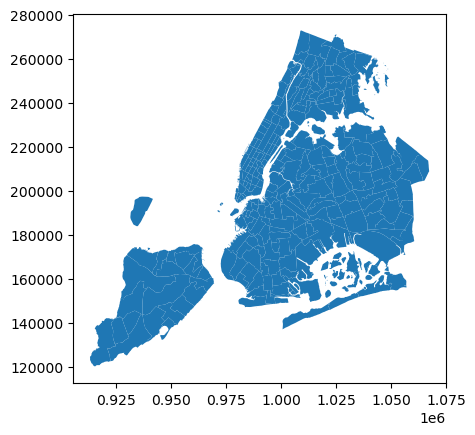

In [192]:
#print(zones.info())
print(zones.info())
#zones.plot()
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [196]:
# Merge zones and trip records using locationID and PULocationID
mapped_df = newdf.merge(zones, left_on = 'PULocationID',right_on = 'LocationID', how = 'left')


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [198]:
# Group data by location and calculate the number of trips

trip_count = newdf.groupby('PULocationID').size().reset_index(name='trip_count')
print(trip_count)
trip_count.sort_values(by='trip_count', ascending=False)

     PULocationID  trip_count
0               1           4
1               4         286
2               7          57
3              10           1
4              12          64
..            ...         ...
165           261        1062
166           262        3168
167           263        4451
168           264        1756
169           265          22

[170 rows x 2 columns]


PULocationID  trip_count
150           237       11209
98            161       10283
149           236       10163
99            162        8206
85            142        7736
..            ...         ...
136           222           1
126           210           1
133           218           1
128           212           1
42             71           1

[170 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [202]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_count, left_on='LocationID', right_on='PULocationID', how='left')
zones['trip_count'] = zones['trip_count'].fillna(0)

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

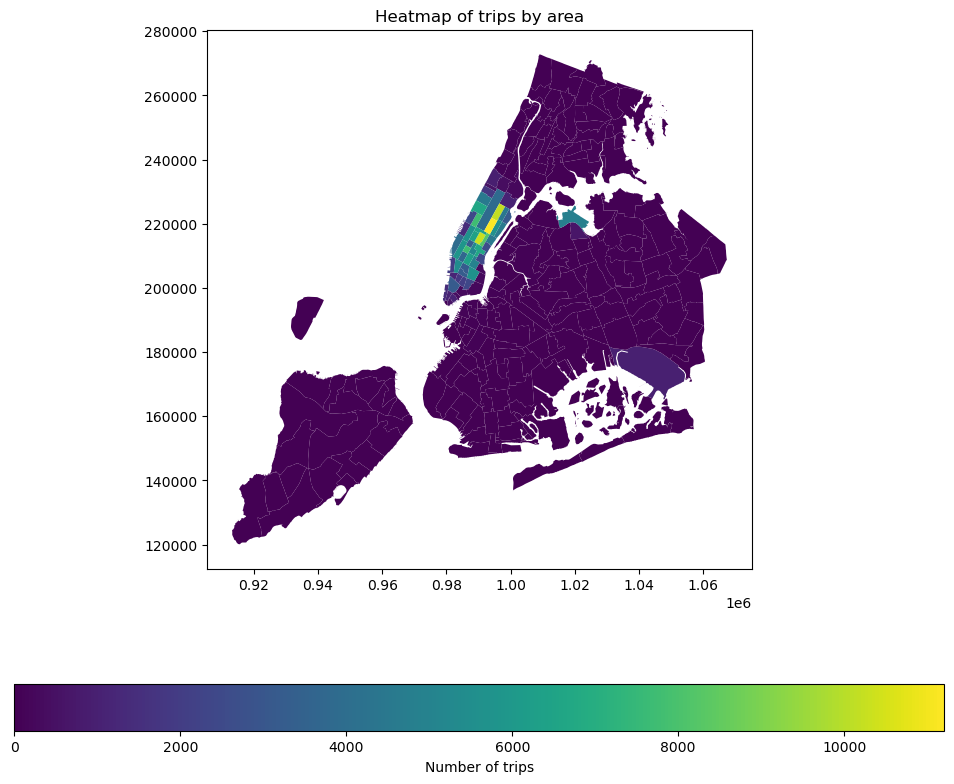

In [210]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
zones.plot(
column = 'trip_count',
ax = ax,
legend = True,
legend_kwds = {'label': "Number of trips", 'orientation':"horizontal"}
    
)
plt.title('Heatmap of trips by area')
plt.show()

In [228]:
# can you try displaying the zones DF sorted by the number of trips?
new_zones = zones.sort_values(by = 'trip_count')
print(new_zones.head(20))


     OBJECTID  Shape_Leng  Shape_Area                               zone  \
108       109    0.178268    0.001170                        Great Kills   
101       102    0.136900    0.000297                           Glendale   
100       101    0.101710    0.000452                          Glen Oaks   
250       251    0.137711    0.000626                        Westerleigh   
98         99    0.183371    0.001210                    Freshkills Park   
173       174    0.067818    0.000156                            Norwood   
95         96    0.185180    0.000548          Forest Park/Highland Park   
174       175    0.134898    0.000505                    Oakland Gardens   
93         94    0.049833    0.000063                      Fordham South   
175       176    0.151995    0.000658                            Oakwood   
91         92    0.117830    0.000375                           Flushing   
251       252    0.158004    0.001025                         Whitestone   
177       17

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [240]:
# Find routes which have the slowest speeds at different times of the day
hourlydata=newdf.pivot_table(
    
        values=['trip_duration','trip_distance'],
        index = ['PULocationID','DOLocationID'],
        columns = newdf['hour'],
        aggfunc = 'mean'
)
pivoted_speed = hourlydata['trip_distance']/hourlydata['trip_duration']
slowest_routes = pivoted_speed.min(axis=1).sort_values()
slowest_routes.head(20)

PULocationID  DOLocationID
164           262            -0.269221
163           238            -0.153662
246           158            -0.106965
50            239            -0.042654
238           263            -0.036412
138           66              0.000198
132           164             0.000209
              249             0.000271
151           24              0.000355
43            10              0.000371
233           48              0.000993
246           43              0.001809
140           262             0.001984
170           125             0.002193
233           246             0.002311
255           256             0.002353
260           260             0.002360
230           233             0.002428
231           50              0.002602
90            209             0.002640
dtype: float64

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

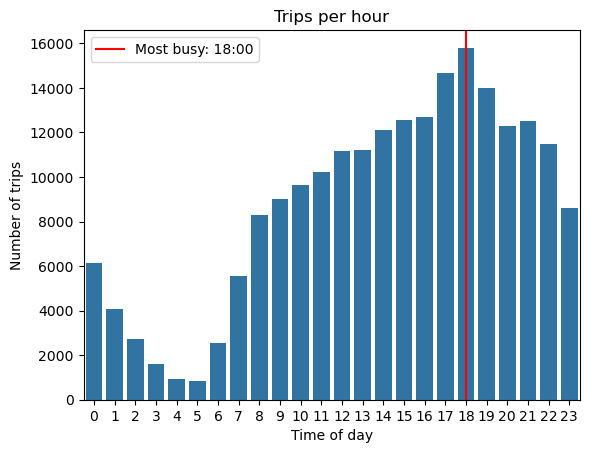

In [280]:
# Visualise the number of trips per hour and find the busiest hour
trips_by_hour = newdf['hour'].value_counts().sort_index()
busiesthour = trips_by_hour.idxmax()
busiesttrip = trips_by_hour.max()
sns.barplot(x = trips_by_hour.index ,y = trips_by_hour.values,)
plt.axvline(x = busiesthour,color  = 'red',linestyle='-',label = f"Most busy: {busiesthour}:00")
plt.xlabel('Time of day')
plt.ylabel('Number of trips')
plt.title('Trips per hour')
plt.xticks(range(0,24))
plt.legend()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [286]:
# Calculate trips by hour
trips_by_hour = newdf['hour'].value_counts().sort_index()
# Sort and get the top 5 busiest hours
scaledtrips = sorted(trips_by_hour.items(), key=lambda x: x[1], reverse=True)[:5]
# Print results
print("Top 5 busiest hours:", scaledtrips)


Top 5 busiest hours: [(18, 15802), (17, 14674), (19, 13983), (16, 12671), (15, 12536)]


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

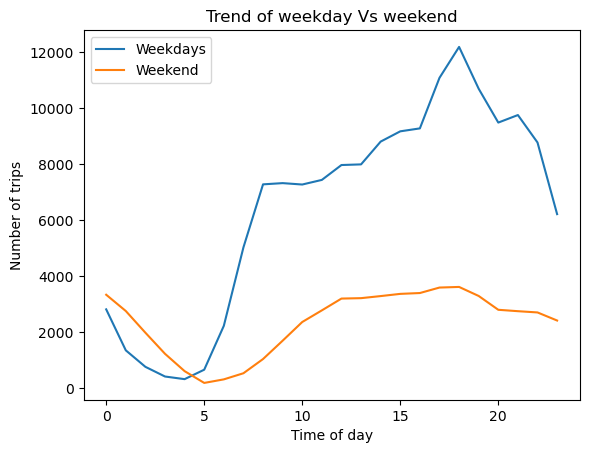

In [294]:
# Compare traffic trends for the week days and weekends
newdf['day_of_week'] = newdf['tpep_pickup_datetime'].dt.day_name()
newdf['day_type'] = newdf['day_of_week'].apply(lambda x: 'Weekend' if x in 'Saturday' or x in 'Sunday' else 'Weekday')
trips_per_hour = newdf.groupby(['day_type','hour']).size().unstack(0)
sns.lineplot(x=trips_per_hour.index,y=trips_per_hour['Weekday'], label = 'Weekdays')
sns.lineplot(x=trips_per_hour.index,y=trips_per_hour['Weekend'], label = 'Weekend')
plt.xlabel('Time of day')
plt.ylabel('Number of trips')
plt.title('Trend of weekday Vs weekend')
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [296]:
# Find top 10 pickup and dropoff zones
top_pickups = newdf['PULocationID'].value_counts().nlargest(10)
top_dropoffs = newdf['DOLocationID'].value_counts().nlargest(10)
print(top_pickups)
print(top_dropoffs)


PULocationID
237    11209
161    10283
236    10163
162     8206
142     7736
186     7720
170     6688
239     6619
230     6431
163     6325
Name: count, dtype: int64
DOLocationID
236    10764
237     9812
161     8391
170     6660
239     6445
162     6442
142     6410
141     6362
230     5698
234     5549
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [298]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
bottom_pickups = newdf['PULocationID'].value_counts().nsmallest(10)
bottom_dropoffs = newdf['DOLocationID'].value_counts().nsmallest(10)
print(bottom_pickups)
print(bottom_dropoffs)



PULocationID
241    1
222    1
212    1
91     1
98     1
154    1
55     1
130    1
235    1
54     1
Name: count, dtype: int64
DOLocationID
60     1
212    1
96     1
259    1
19     1
156    1
30     1
183    1
253    1
242    1
Name: count, dtype: int64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [306]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
nighthour = newdf[(newdf['hour']>23) | (newdf['hour']>=23) | (newdf['hour']<=5)]
nighthour.head(10)
nighthour.tail(10)



Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
299865     1550208         2  2023-09-16 01:07:32   2023-09-16 01:12:35   
299877      113262         2  2023-03-02 00:31:18   2023-03-02 00:37:46   
299900     1358880         2  2023-05-12 23:31:27   2023-05-12 23:56:13   
299910     1991177         2  2023-04-19 23:09:28   2023-04-19 23:23:46   
299916     1204714         2  2023-03-11 23:12:24   2023-03-11 23:32:06   
299932      343956         2  2023-06-03 23:15:48   2023-06-03 23:20:34   
299939     3287198         2  2023-06-25 00:52:06   2023-06-25 01:07:50   
299943     3056623         2  2023-05-28 02:32:44   2023-05-28 02:37:25   
299956     1577692         1  2023-04-16 00:09:10   2023-04-16 00:17:55   
299982     1684749         1  2023-01-18 23:21:12   2023-01-18 23:23:05   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
299865              2.0           0.47         1.0                  N   
299877              1.0           1.84         1.0                  N   
299900              2.0           3.25         1.0                  N   
299910              1.0           2.14         1.0                  N   
299916              2.0           3.73         1.0                  N   
299932              1.0           1.35         1.0                  N   
299939              1.0           6.82         1.0                  N   
299943              1.0           0.63         1.0                  N   
299956              1.0           0.50         1.0                  N   
299982              2.0           0.70         1.0                  N   

        PULocationID  DOLocationID  ...  congestion_surcharge  hour  \
299865            79           224  ...                   2.5     1   
299877           161            90  ...                   2.5     0   
299900           148           246  ...                   2.5    23   
299910            90            48  ...                   2.5    23   
299916           249           237  ...                   2.5    23   
299932           237           233  ...                   2.5    23   
299939           209           226  ...                   2.5     0   
299943            90            68  ...                   2.5     2   
299956           148           148  ...                   2.5     0   
299982           233           137  ...                   2.5    23   

        combined_airport_fee  day_of_pick  pickupmonth  month  quarter  \
299865                   0.0            5            9      9        3   
299877                   0.0            3            3      3        1   
299900                   0.0            4            5      5        2   
299910                   0.0            2            4      4        2   
299916                   0.0            5            3      3        1   
299932                   0.0            5            6      6        2   
299939                   0.0            6            6      6        2   
299943                   0.0            6            5      5        2   
299956                   0.0            6            4      4        2   
299982                   0.0            2            1      1        1   

        trip_duration  day_of_week  day_type  
299865       5.050000     Saturday   Weekend  
299877       6.466667     Thursday   Weekday  
299900      24.766667       Friday   Weekday  
299910      14.300000    Wednesday   Weekday  
299916      19.700000     Saturday   Weekend  
299932       4.766667     Saturday   Weekend  
299939      15.733333       Sunday   Weekend  
299943       4.683333       Sunday   Weekend  
299956       8.750000       Sunday   Weekend  
299982       1.883333    Wednesday   Weekday  

[10 rows x 28 columns]

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [308]:
# Filter for night hours (11 PM to 5 AM)

nighthour

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
4          1621670         2  2023-03-16 00:18:39   2023-03-16 00:28:07   
32         2280434         1  2023-06-21 23:45:13   2023-06-21 23:51:18   
41          120805         2  2023-06-02 00:38:44   2023-06-02 00:53:06   
52         2118488         2  2023-04-21 01:06:39   2023-04-21 01:20:49   
57         1669018         1  2023-12-15 01:05:21   2023-12-15 01:12:05   
...            ...       ...                  ...                   ...   
299932      343956         2  2023-06-03 23:15:48   2023-06-03 23:20:34   
299939     3287198         2  2023-06-25 00:52:06   2023-06-25 01:07:50   
299943     3056623         2  2023-05-28 02:32:44   2023-05-28 02:37:25   
299956     1577692         1  2023-04-16 00:09:10   2023-04-16 00:17:55   
299982     1684749         1  2023-01-18 23:21:12   2023-01-18 23:23:05   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
4                   1.0           3.31         1.0                  N   
32                  1.0           1.80         1.0                  N   
41                  1.0           3.19         1.0                  N   
52                  1.0           6.31         1.0                  N   
57                  4.0           1.10         1.0                  N   
...                 ...            ...         ...                ...   
299932              1.0           1.35         1.0                  N   
299939              1.0           6.82         1.0                  N   
299943              1.0           0.63         1.0                  N   
299956              1.0           0.50         1.0                  N   
299982              2.0           0.70         1.0                  N   

        PULocationID  DOLocationID  ...  congestion_surcharge  hour  \
4                107           140  ...                   2.5     0   
32                79           170  ...                   2.5    23   
41               211            48  ...                   2.5     0   
52               132           265  ...                   0.0     1   
57               148            79  ...                   2.5     1   
...              ...           ...  ...                   ...   ...   
299932           237           233  ...                   2.5    23   
299939           209           226  ...                   2.5     0   
299943            90            68  ...                   2.5     2   
299956           148           148  ...                   2.5     0   
299982           233           137  ...                   2.5    23   

        combined_airport_fee  day_of_pick  pickupmonth  month  quarter  \
4                       0.00            3            3      3        1   
32                      0.00            2            6      6        2   
41                      0.00            4            6      6        2   
52                      1.75            4            4      4        2   
57                      0.00            4           12     12        4   
...                      ...          ...          ...    ...      ...   
299932                  0.00            5            6      6        2   
299939                  0.00            6            6      6        2   
299943                  0.00            6            5      5        2   
299956                  0.00            6            4      4        2   
299982                  0.00            2            1      1        1   

        trip_duration  day_of_week  day_type  
4            9.466667     Thursday   Weekday  
32           6.083333    Wednesday   Weekday  
41          14.366667       Friday   Weekday  
52          14.166667       Friday   Weekday  
57           6.733333       Friday   Weekday  
...               ...          ...       ...  
299932       4.766667     Saturday   Weekend  
299939      15.733333       Sunday   Weekend  
299943       4.683333       Sunday   Weekend  
299956       8.750

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [312]:
# Analyse the fare per mile per passenger for different passenger counts
(newdf['trip_distance'] < 0).sum()
(newdf['passenger_count'] <= 0).sum()
trip = newdf[(newdf['trip_distance'] > 0) & (newdf['passenger_count'] > 0)]
trip['fare_per_mile'] = trip['fare_amount'] / trip['trip_distance']
trip['fare_per_mile_per_passenger'] = trip['fare_per_mile'] / trip['passenger_count']
trip

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
2          3263694         2  2023-05-30 17:11:50   2023-05-30 17:19:50   
3          1626337         2  2023-05-15 14:55:35   2023-05-15 15:09:40   
4          1621670         2  2023-03-16 00:18:39   2023-03-16 00:28:07   
6          1038493         2  2023-08-12 11:14:11   2023-08-12 11:45:17   
7          1007796         2  2023-09-11 11:36:13   2023-09-11 11:38:31   
...            ...       ...                  ...                   ...   
299974     3015130         1  2023-01-10 12:40:49   2023-01-10 12:55:35   
299977      558396         2  2023-07-08 12:48:23   2023-07-08 12:51:07   
299978     2041602         2  2023-02-21 10:18:33   2023-02-21 10:24:08   
299979     2411945         2  2023-01-26 08:04:03   2023-01-26 08:13:55   
299982     1684749         1  2023-01-18 23:21:12   2023-01-18 23:23:05   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
2                   1.0           1.03         1.0                  N   
3                   1.0           2.09         1.0                  N   
4                   1.0           3.31         1.0                  N   
6                   4.0           7.90         1.0                  N   
7                   1.0           0.34         1.0                  N   
...                 ...            ...         ...                ...   
299974              1.0           1.10         1.0                  N   
299977              1.0           0.41         1.0                  N   
299978              1.0           0.65         1.0                  N   
299979              2.0           1.54         1.0                  N   
299982              2.0           0.70         1.0                  N   

        PULocationID  DOLocationID  ...  combined_airport_fee  day_of_pick  \
2                140           262  ...                   0.0            1   
3                158           161  ...                   0.0            0   
4                107           140  ...                   0.0            3   
6                143            45  ...                   0.0            5   
7                170           164  ...                   0.0            0   
...              ...           ...  ...                   ...          ...   
299974           164            48  ...                   0.0            1   
299977           230           161  ...                   0.0            5   
299978           137           170  ...                   0.0            1   
299979           141           161  ...                   0.0            3   
299982           233           137  ...                   0.0            2   

        pickupmonth  month  quarter  trip_duration  day_of_week  day_type  \
2                 5      5        2       8.000000      Tuesday   Weekday   
3                 5      5        2      14.083333       Monday   Weekday   
4                 3      3        1       9.466667     Thursday   Weekday   
6                 8      8        3      31.100000     Saturday   Weekend   
7                 9      9        3       2.300000       Monday   Weekday   
...             ...    ...      ...            ...          ...       ...   
299974            1      1        1      14.766667      Tuesday   Weekday   
299977            7      7        3       2.733333     Saturday   Weekend   
299978            2      2        1       5.583333      Tuesday   Weekday   
299979            1      1        1       9.866667     Thursday   Weekday   
299982            1      1        1       1.883333    Wednesday   Weekday   

        fare_per_mile  fare_per_mile_per_passenger  
2            9.029126                     9.029126  
3            7.129187                     7.129187  
4            4.501511                     4.501511  
6            4.898734                     1.224684  
7           12.941176                    12.941176  
...               ...                          ...

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [316]:
# Compare the average fare per mile for different days and for different times of the day
newdf['fare_per_mile']= newdf['fare_amount']/newdf['trip_distance']
avg_fare_per_mile = newdf.groupby('hour')['fare_per_mile'].mean()
avg_fare_per_mile


hour
0      9.019423
1      8.559004
2      8.500665
3      6.787881
4     11.499586
5      9.048164
6     10.832965
7      8.014060
8      9.884887
9      9.640278
10     9.686089
11    10.106635
12     9.359283
13    10.573497
14    11.425417
15    10.348867
16    12.767024
17    10.271478
18     9.414795
19     8.882311
20     7.535664
21     8.009783
22     9.242193
23     8.848175
Name: fare_per_mile, dtype: float64

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

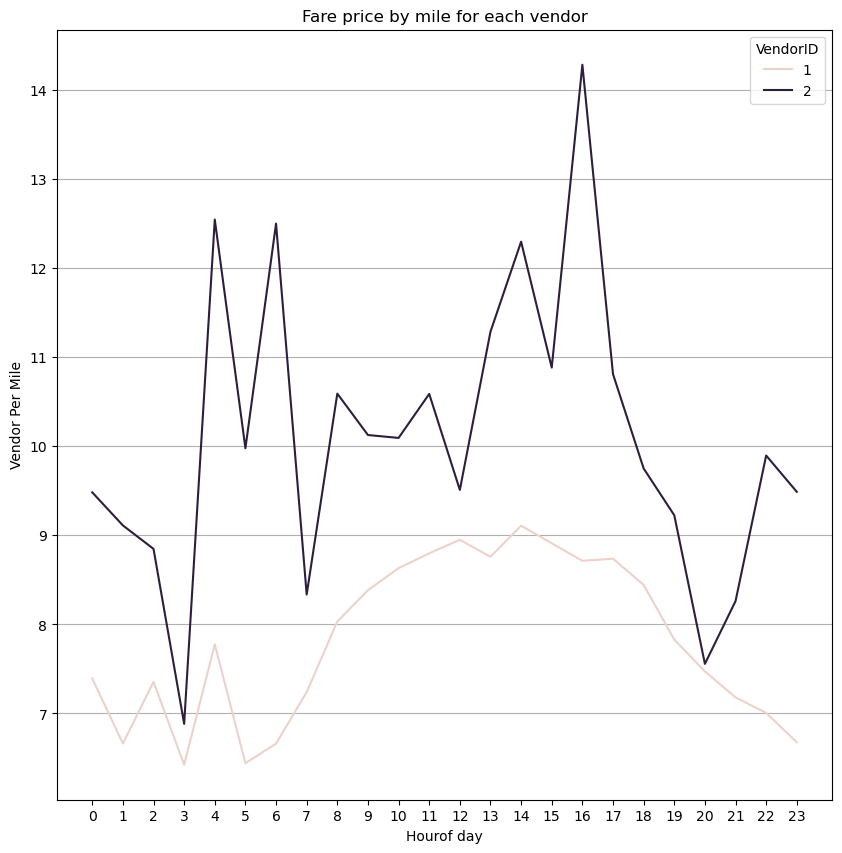

In [322]:
# Compare fare per mile for different vendors
vendor_price_per_mile = newdf.groupby(['VendorID','hour'])['fare_per_mile'].mean().reset_index()
plt.figure(figsize=(10,10))
sns.lineplot(data=vendor_price_per_mile,x='hour',y='fare_per_mile',hue='VendorID')
plt.xlabel('Hourof day')
plt.ylabel('Vendor Per Mile')
plt.title('Fare price by mile for each vendor')
plt.legend(title='VendorID')
plt.grid(True,axis='y',linestyle='-')
plt.xticks(range(0,24))
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [326]:
# Defining distance tiers
bins = [0, 2, 5, float('inf')]
labels = ['Short trip', 'Medium trip', 'Long trip']
trip['distance_tier'] = pd.cut(trip['trip_distance'], bins=bins, labels=labels)


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [334]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
trip['tip_percentage'] = (trip['tip_amount'] / trip['fare_amount']) * 100
print(trip['tip_percentage'])

2         33.978495
3         25.369128
4         33.355705
6         22.067183
7         38.181818
            ...    
299974    12.962963
299977    35.686275
299978    27.777778
299979    27.476636
299982    39.215686
Name: tip_percentage, Length: 207314, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [338]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [340]:
# How often is each surcharge applied?
surcharge_column = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']
surcharge_amount = newdf[surcharge_column].sum()
total_trips = len(newdf)
percentage_of_surcharge = (surcharge_amount / total_trips) * 100
surcharge_details = pd.DataFrame({'Count': surcharge_amount, 'Percentage (%)': percentage_of_surcharge})
print(surcharge_details)


                           Count  Percentage (%)
extra                  326090.18      154.876883
mta_tax                105086.10       49.910757
improvement_surcharge  210465.90       99.961007
congestion_surcharge   511307.50      242.846049


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

When routes are being slowed down due to heavy traffic based of slower routes during the highest travel time alternate routes can be found to help finish the trip fast , whilst there might more distance to cover it would end up in shorter trip times which could then allow for another trip to be taken during surcharge hour which would be better and not inefficent .

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Having cabs placed in zones where the most pick ups are around peak hour would enable faster service which would lead to happier customers and brand loyalty which would lead to more retention.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Whilst peak hour has a surcharge to maintain competitive rates we can give discounts based of paument type by partnerering with credit card companies as the data shows the prefered payment type for the same is credit cards.